Decision Tree란 독립변수들을 이진 분리 혹은 다진 분리를 하는 과정을 반복하여 트리 형태를 형성함으로써 분류(종속변수가 범주형일 때) 또는 회귀(종속변수가 연속형일 때)를 수행하는 예측 모델링 방법 중 하나이다. 

# 의사결정나무 예시

![Decision Tree](https://www.dropbox.com/s/st4wrqqqho0jukn/decisiontree2.jpg?raw=1)
위의 예시는 타이타닉호 승객의 생존을 예측하는 이진 분류 문제이다. 만약 남자이고, 나이가 9.5가 넘으면 생존 확률이 17%, 여자면 생존 확률이 73%라고 예측을 한 것이다.
이와 같이 의사결정나무는 Root Node에서 시작하여 변수 하나를 가지고 계속 분기하면서 최종 Leaf Node에 도달하게 된다.

의사결정나무는 분류와 회귀 문제를 모두 적용할 수 있다.
* 분류(Classification) : 예측하고자 하는 example이 어느 Leaf Node에 속한다면, 그 Leaf Node에서 가장 **빈도가 높은 범주**에 해당 example을 예측
* 회귀(Regression) : 예측하고자 하는 example이 어느 Leaf Node에 속한다면, 그 Leaf Node의 **평균값**을 해당 example로 예측

# 분기 기준

노드가 분기될 때 분기 이후 각 노드의 순도가 증가하고 불순도/불확실성은 감소하는 방향으로 학습을 진행한다. 이러한 것을 정보 획득(Information Gain)이라고 한다. 순수도(불순도)를 나타내는 지표에는 다음과 같은 것들이 있다.
* Entropy
* Gini Index

## Entropy
Entropy란 '얼마만큼의 정보를 담고 있는가'를 나타내는 것이다. 만약 하나의 집합에 단 하나의 클래스만 존재한다면, 불확실성이 전혀 없고 Entropy는 매우 낮은 값을 갖는다. 반면 모든 클래스가 고르게 분포한다면, 불확실성은 매우 높고 Entropy는 매우 높은 값을 갖는다. 노드 A의 Entropy는 다음과 같이 계산한다.
$$\text{Entropy}(A) = -\sum_{j=1}^{m} p_j\log_2{p_j}$$
$$p_j : \text{노드 A에 속하는 데이터 중 j 클래스에 속하는 데이터의 비율}$$

의사결정나무에서는 가장 많은 정보(정보 획득)를 주는 변수를 선택하여 분기를 진행한다. 정보 획득이란 노드 분기 전후의 정보량의 차이로, 다음 분류 스텝에서 특정 변수를 선택했을 때 전체 데이터의 Entropy가 줄어든 양을 나타낸다.  
* 클래스 집합 : $C = {C_1, C_2, \cdots, C_k}$
* Train data set의 부분 집합(= 하나의 Node) : $T$
* $T$ Node 내의 Class $C_j$의 수 : $freq(C_j, T)$
* $T$ Node 내의 데이터 수 : $\left\vert T \right\vert$
* Node내 데이터들의 Class 확인에 필요한 정보량 : : $Info(T) = -\sum \frac{freq(C_j, T)}{\left\vert T \right\vert} \times \log_2{\frac{freq(C_j, T)}{\left\vert T \right\vert}}$
* 변수 X에 의해 분기된 Node들의 정보량들의 가중 평균 : $Info_X(T) = \sum_{i=1}^{n} \frac{\left\vert T_i \right\vert}{\left\vert T \right\vert} \times Info(T_i)$
* 정보 획득 : $Gain(X) = Info(T) - Info_X(T)$  

정보 획득($Gain(X)$)가 최대가 되는 변수 X를 선택하여 분기를 진행한다.

다음은 Entropy를 이용하여 분기를 진행하는 예시이다.
![Information Gain](https://www.dropbox.com/s/r531qz06avaayrm/informationgain.jpg?raw=1)
$$Info(T) = -\frac{9}{14}\cdot\log_2{\left(\frac{9}{14}\right)} -\frac{5}{14}\cdot\log_2{\left(\frac{5}{14}\right)} = 0.940$$

$$Info_X(T) = \frac{5}{14}\cdot\left(-\frac{2}{5}\cdot \log_2{\left(\frac{2}{5}\right)} -\frac{3}{5}\cdot \log_2{\left(\frac{3}{5}\right)}\right) + \frac{5}{14}\cdot\left(-\frac{3}{5}\cdot\log_2{\left(\frac{3}{5}\right)} -\frac{2}{5}\cdot\log_2{\left(\frac{2}{5}\right)}\right) + \frac{4}{14}\cdot\left(-\frac{4}{4}\cdot\log_2{\left(\frac{4}{4}\right)} -\frac{0}{4}\cdot\log_2{\left(\frac{0}{4}\right)}\right) = 0.694$$

$$Gain(X) = Info(T) - Info_X(T) = 0.246$$

## Gini Index
Gini Index는 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표이다. 어떤 집합에서 한 항목을 뽑아 무작위로 라벨을 추정할 때 틀릴 확률을 말한다. 집합에 있는 항목이 모두 같다면 Gini Index는 0을 갖게 되며 완전히 순수하다고 말할 수 있다.
$$Gini(T) = 1 - \sum_{j=1}^{k}\left(\left(\frac{freq(C_j, T)}{\left\vert T \right\vert}\right)^2\right) = 1 - \sum_{j=1}^{k} p_j^2$$

$$Gini_X(T) = \frac{\left\vert T_1 \right\vert}{\left\vert T \right\vert}Gini(T_1) + \frac{\left\vert T_2 \right\vert}{\left\vert T \right\vert}Gini(T_2)$$

$Gini_X(T)$가 최소가 되는 변수 X를 선택한다.

다음은 Gini Index를 사용하여 분기를 진행하는 예시이다.
![Gini Index](https://www.dropbox.com/s/cqb95d6ivrnhsp8/giniindex.jpg?raw=1)
$$Gini_X(T) = \frac{3}{8} Gini(T_1) + \frac{5}{8} Gini(T_2) = \frac{3}{8}\left(1 - \left(\frac{1}{3}\right)^2 - \left(\frac{2}{3}\right)^2 \right) + \frac{5}{8}\left(1 - \left(\frac{4}{5}\right)^2 - \left(\frac{1}{5}\right)^2\right)$$

아래는 클래스가 2개일 때 하나의 클래스의 비율에 따른 Entropy와 Gini Index의 변화량을 나타내는 그래프이다.

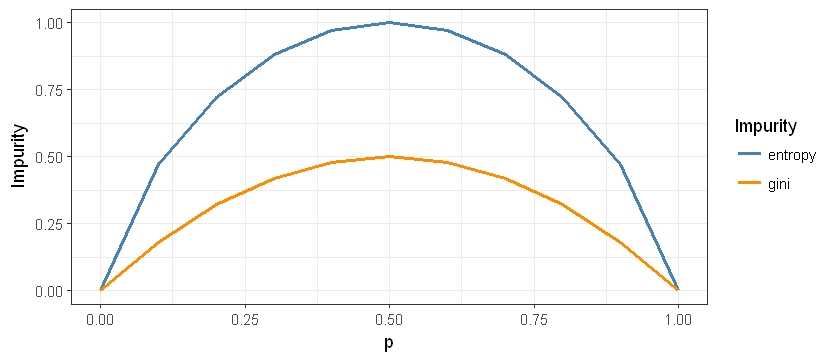

In [72]:
# Load library
library(ggplot2)
library(dplyr)
library(tidyr)
options(repr.plot.width=7, repr.plot.height=3)

# Generate data
x1 <- seq(0, 1, 0.1) # p_1
x2 <- seq(1, 0, -0.1) # p_2
entropy <- -(x1 * log2(x1)) + -(x2 * log2(x2))
gini <- 1 - (x1^2 + x2^2)

# Make data.frame
df <- data.frame(p = x1, entropy = entropy, gini = gini)
df[is.nan(df$entropy), "entropy"] <- 0

# Plot
df %>% gather(key = "type", value = "Impurity", -p) %>%
    ggplot(aes(p, Impurity, group = type, col = type)) + geom_line(size = 1) + 
    scale_color_manual(name = "Impurity", 
                      values = c("steelblue", "darkorange")) + theme_bw()

# 가지치기(Pruning)

의사결정나무에서 중요한 요소 중 하나로 가지치기가 있다. 의사결정나무는 재귀적으로 분기를 진행하여 모델을 생성하다보면, 모델이 과적합될 수 있다. 극단적으로 예를 들자면 각 Leaf Node별로 하나의 데이터만 남게끔 계속 분기를 진행하여 모델을 생성하면 train set에 대해 과적합되어 잘못된 모델을 생성하게 된다. 이러한 과적합을 막기 위해서 적절한 시점에 가지치기를 수행해줘야 한다.

# 특징

의사결정나무는 다음과 같은 장단점을 갖고 있다.

## 장점
* 비모수적 방법으로 사전에 어떠한 통계적 가정이 불필요
* 모형의 해석이 용이하여 쉽게 이해 가능
* 계산효율성이 높음

## 단점
* 결정경계가 데이터 축에 수직적이여서 비선형 데이터 분류에는 적합하지 않음
* 연속형 변수를 비연속적인 값으로 취급하기 때문에 분리의 경계점 근방에서는 예측 오류가 클 가능성이 높음